<font size=7> Burst Attempt

In [1]:
from human_hip import spike_data
import numpy as np

In [2]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

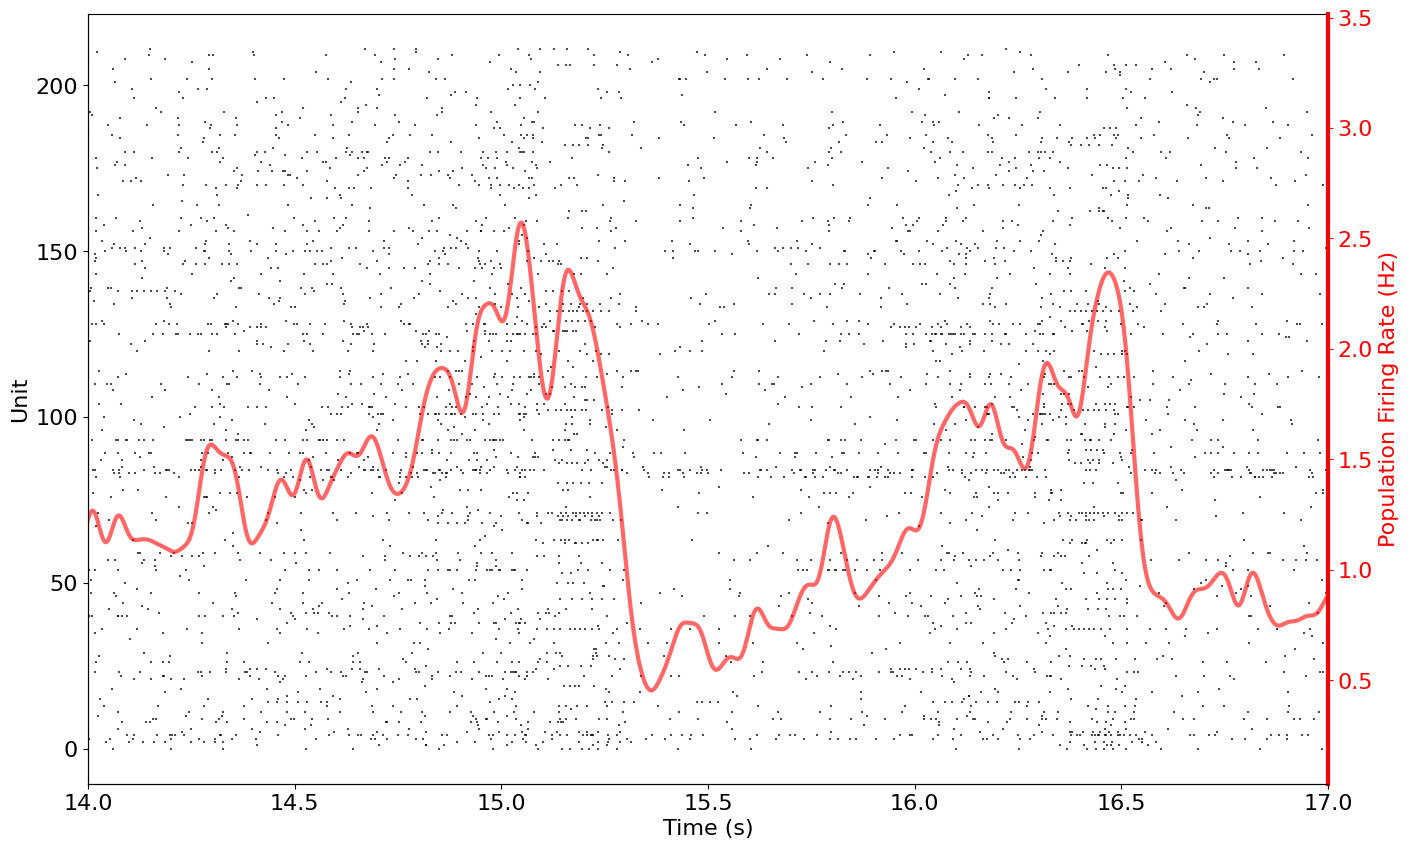

In [13]:
spike_data.plot_raster( sd, size=(16,10), xlim=(14, 17) )

# <font color="red"> Old Stuff

In [15]:

def firing_rates(spike_data):
    """
    input: a spike data object, the common data format used by braingeneers
    output: a numpy array of the mean firing rate of each neuron in the spike data object
    """
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)
    return np.array(mean_firing_rates)


In [27]:
import os
import re
import glob
import random
import numpy as np
import scipy
import scipy.io as sio
import scipy.ndimage as ndimage
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from PIL import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import braingeneers
import braingeneers.data.datasets_electrophysiology as ephys
from braingeneers.analysis.analysis import SpikeData, read_phy_files
from scipy.ndimage import gaussian_filter1d

/tmp/ipykernel_6051/40695755.py:26: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


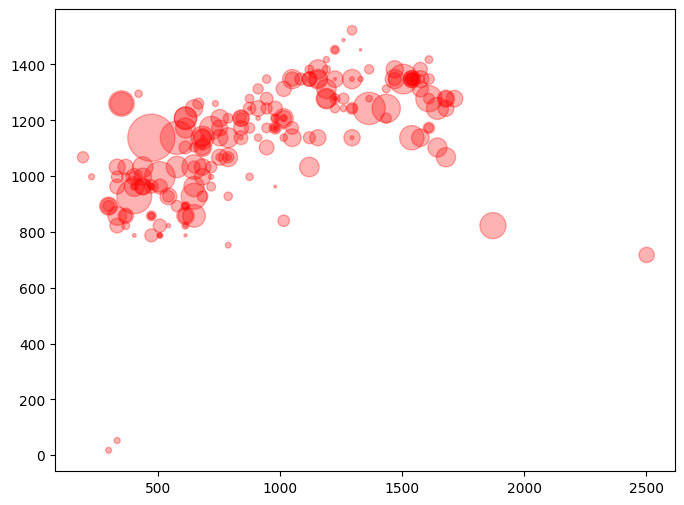

In [43]:
#sd = read_phy_files(filepath)

# Subset the spike data
sd_start = sd.subtime(0, 20000)

def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

# Calculate firing rates
firing_rates = calculate_mean_firing_rates(sd_start)

def firing_plotter(sd):
    firing_rates = calculate_mean_firing_rates(sd)

    neuron_x = []
    neuron_y = []
    neuron_amp = []

    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])

    plt.figure(figsize=(8, 6))
    # Increase the 's' parameter to make the scatter points larger
    # Adjust the 'alpha' parameter to make the scatter points less opaque
    plt.scatter(neuron_x, neuron_y, s=firing_rates*20 + firing_rates**1.5, alpha=0.3, c='r')

    plt.show()

# Plot firing rates
firing_plotter(sd_start)

# Get burst between 14.57-14.75 seconds

In [44]:
sd_start = sd.subtime( 14.57*1000 ,  14.75*1000 )

/tmp/ipykernel_6051/40695755.py:26: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


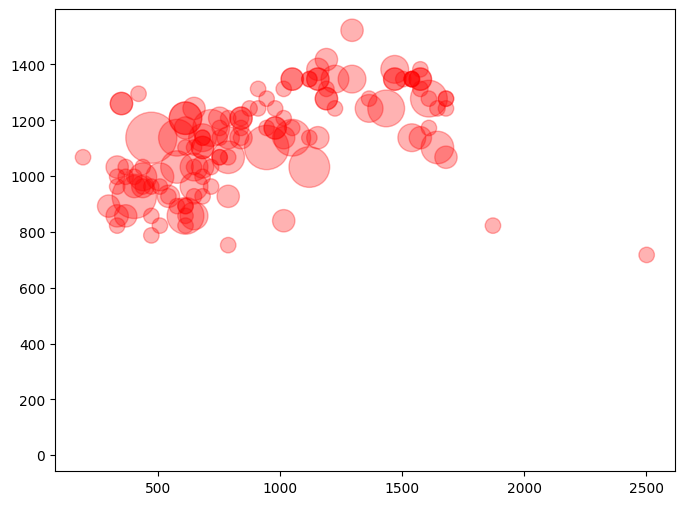

In [45]:
firing_plotter(sd_start)

# Get burst between 14.75-14.95

In [46]:
sd_start = sd.subtime(  14.75*1000, 14.95*1000 )

/tmp/ipykernel_6051/40695755.py:26: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


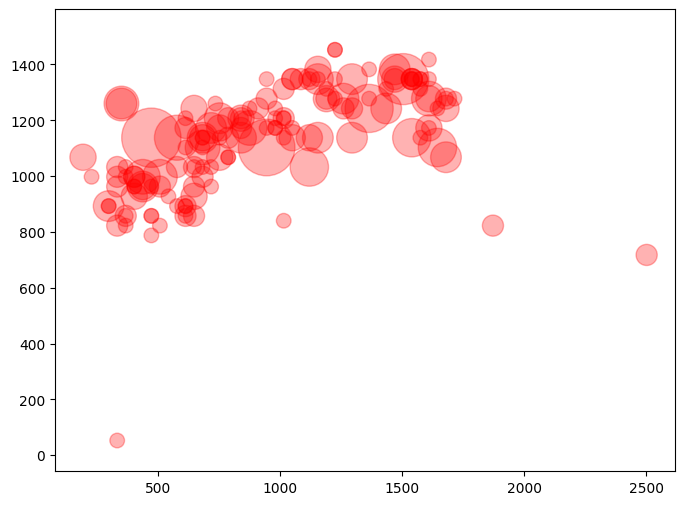

In [47]:
firing_plotter(sd_start)